In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from math import sqrt

def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE))
    

In [2]:
airbnb_df = pd.read_csv(r"C:\Users\darre\OneDrive\Documents\Capstone One Clean\Airbnb_NYC_Original.csv")
airbnb_df.head(5)

,beds,city,market,bedrooms,bathrooms,minimum_nights,price,property_type,accommodates,room_type,neighbourhood_group_cleansed,availability_365,latitude_longitude_bin
0,1,188,11,0,2,7,225.0,1,1,0,2,365,13
1,17,48,11,1,2,1,89.0,19,3,0,1,137,9
2,1,188,11,1,2,3,200.0,1,2,0,2,0,13
3,1,188,11,1,2,2,79.0,1,2,2,2,216,13
4,1,188,11,1,2,2,79.0,1,1,2,2,0,16


In [3]:
#shuffle rows and create training and testing sets
airbnb_df_shuffled = shuffle(airbnb_df)

airbnb_df_shuffled.head(5)

,beds,city,market,bedrooms,bathrooms,minimum_nights,price,property_type,accommodates,room_type,neighbourhood_group_cleansed,availability_365,latitude_longitude_bin
34129,1,48,11,1,2,2,100.0,1,3,0,1,0,9
46639,1,48,11,1,2,2,180.0,23,2,0,1,360,9
30415,1,225,11,1,2,1,200.0,1,6,0,3,359,6
17804,11,225,11,1,2,30,143.0,13,4,0,3,131,14
1407,11,39,11,1,2,2,39.0,1,3,2,0,286,17


In [4]:
y = airbnb_df_shuffled['price']
X = airbnb_df_shuffled.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33,random_state = 42)

In [5]:
model = RandomForestClassifier(n_estimators = 50, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [6]:
model.score(X_test, y_test)

0.07255825184112037

In [7]:
evaluate_model(model, X_test, y_test)

Median Absolute Error: 29.0
RMSE: 105.25


In [8]:
evaluate_model(model, X_train, y_train)

Median Absolute Error: 0.0
RMSE: 44.65


In [9]:
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.2685190627618276

In [10]:
my_pipeline_RF = make_pipeline(SimpleImputer(), StandardScaler(),
                               RandomForestRegressor(n_estimators = 50, random_state=42))

my_pipeline_RF.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=50, n_jobs=None,
                                       oob_

In [11]:
evaluate_model(my_pipeline_RF, X_test, y_test)

Median Absolute Error: 26.31
RMSE: 85.7


In [12]:
evaluate_model(my_pipeline_RF, X_train, y_train)

Median Absolute Error: 13.3
RMSE: 46.08


In [13]:
y_pred = my_pipeline_RF.predict(X_test)
r2_score(y_test,y_pred)

0.515022069277783

In [14]:
y_pred_class = model.predict(X_test)

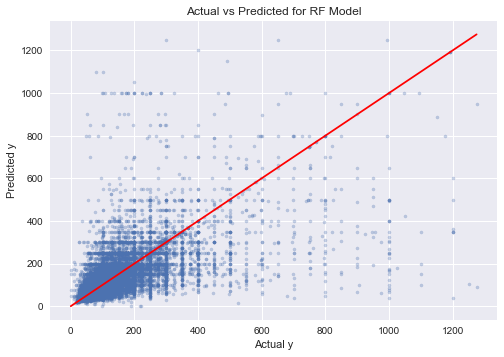

In [15]:
from matplotlib import rcParams


# Build a plot
rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_test, y_pred_class,alpha = .3, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Model')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [16]:
y_pred_pipe = my_pipeline_RF.predict(X_test)

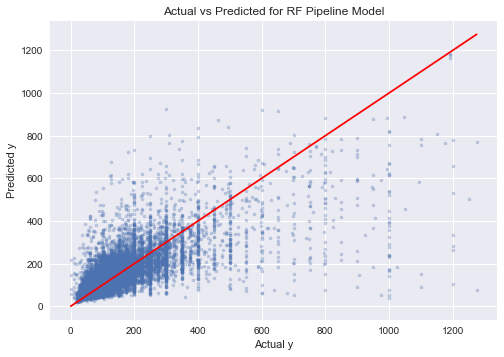

In [17]:
# Build a plot
rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_test, y_pred_pipe,alpha = .3, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Pipeline Model')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [18]:
importances = my_pipeline_RF.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False).head(22)

,feature,importance
8,room_type,0.229834
4,bathrooms,0.160128
10,availability_365,0.151922
5,minimum_nights,0.082541
7,accommodates,0.078692
11,latitude_longitude_bin,0.074367
6,property_type,0.058583
1,city,0.052466
3,bedrooms,0.046050
0,beds,0.043336


In [21]:
#Hyperparamter tuning
z = [('imputer', SimpleImputer())]
z = [('scaler', StandardScaler())]
z = [('rf', RandomForestRegressor(random_state = 42))]
param_grid = {    
             'rf__max_depth': np.arange(1, 25),
             'rf__n_estimators': [50,100]}

tuned_pipeline = Pipeline(z)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33,random_state = 42)
X_train = preprocessing.scale(X_train) 
tuned_pipeline_cv = GridSearchCV(tuned_pipeline, param_grid, cv=3, n_jobs = -1, verbose = 2)
tuned_pipeline_cv.fit(X_train, y_train)
tuned_pipeline_cv.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   39.9s finished


{'rf__max_depth': 13, 'rf__n_estimators': 100}

In [22]:
tuned_pipeline_cv.best_score_

0.5347720125508798

In [23]:
y = airbnb_df_shuffled['price']
X = airbnb_df_shuffled.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33,random_state = 42)
model = RandomForestClassifier(max_depth = 12,n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
evaluate_model(model, X_test, y_test)

Median Absolute Error: 25.0
RMSE: 94.33


In [25]:
evaluate_model(model, X_train, y_train)

Median Absolute Error: 14.0
RMSE: 71.23


In [26]:
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.4124718520181315

In [27]:
y_pred_class2 = model.predict(X_test)

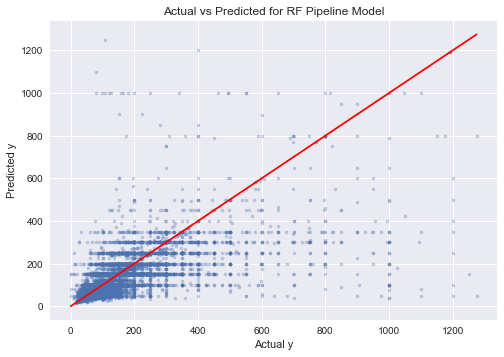

In [28]:
rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_test, y_pred_class2,alpha = .3, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Pipeline Model')

diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [29]:
my_pipeline_RF = make_pipeline(SimpleImputer(), StandardScaler(),
                               RandomForestRegressor(max_depth = 12, n_estimators = 100, random_state=42))

my_pipeline_RF.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=12, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_s

In [30]:
evaluate_model(my_pipeline_RF, X_test, y_test)

Median Absolute Error: 25.61
RMSE: 82.96


In [31]:
evaluate_model(my_pipeline_RF, X_train, y_train)

Median Absolute Error: 23.75
RMSE: 67.55


In [32]:
y_pred = my_pipeline_RF.predict(X_test)
r2_score(y_test,y_pred)

0.5455717904921229

In [33]:
y_pred_pipe2 = my_pipeline_RF.predict(X_test)

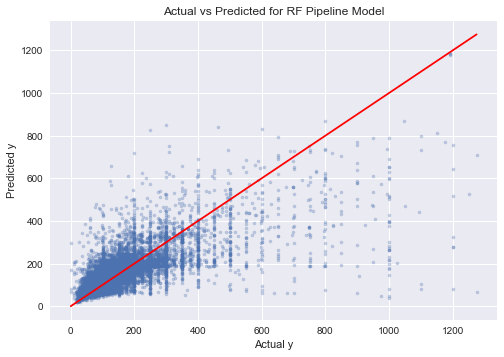

In [34]:
rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_test, y_pred_pipe2,alpha = .3, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Pipeline Model')

diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()